In [1]:
# Step 1: Import libraries
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Step 2: Inspect the data file my co-worker has prepared for me
df = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/hotel_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091 entries, 0 to 4090
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    4091 non-null   object 
 1   Rating  4091 non-null   float64
 2   Text    4091 non-null   object 
dtypes: float64(1), object(2)
memory usage: 96.0+ KB


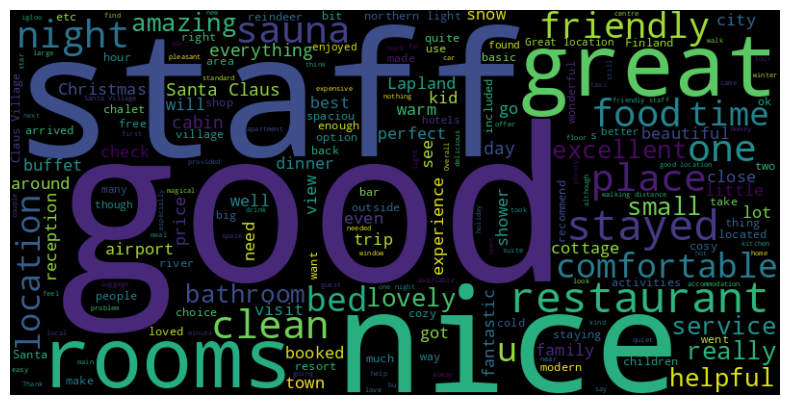

In [3]:
# Step 3: Inspect text using WordCloud

# Combine all text into a single string
text = ' '.join(df['Text'])

# Define the stopwords list
my_stopwords = set(STOPWORDS)
my_stopwords.update(['hotel', 'room', 'stay', 'breakfast', 'Rovaniemi']) #these are the most common ones that bring little value

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, stopwords=my_stopwords, background_color='black').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
# Step 4: Calculate the sentiment using TextBlob (a rule based method)

# Function to calculate polarity using TextBlob
def calculate_polarity(text):
    testimonial = TextBlob(text)
    return testimonial.sentiment.polarity

# Create a new column 'polarity_score_textblob'
df['polarity_score_textblob'] = df['Text'].apply(calculate_polarity)

# Group by 'Name' and calculate the average 'polarity_score_textblob'
average_polarity = df.groupby('Name')['polarity_score_textblob'].mean().reset_index()

# Sort by highest average_polarity
sorted_average_polarity = average_polarity.sort_values(by='polarity_score_textblob', ascending=False)

# Display the sorted average polarity scores
print(sorted_average_polarity)

In [4]:
# Step 5: Create labels for the machine learning models (positive or negative)

# Define the threshold for positive sentiment (ratings 4 or 5)
positive_threshold = 4

# Create a new column 'Sentiment' based on the threshold
df['Sentiment'] = (df['Rating'] >= positive_threshold).astype(int)

# Count the number of positive and negative reviews
positive_reviews = df[df['Sentiment'] == 1].shape[0]
negative_reviews = df[df['Sentiment'] == 0].shape[0]

print(f'Number of Positive Reviews: {positive_reviews}')
print(f'Number of Negative Reviews: {negative_reviews}')

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', df['Sentiment'].value_counts() / len(df))

Number of Positive Reviews: 3350
Number of Negative Reviews: 741
Proportion of positive and negative reviews:  1    0.818871
0    0.181129
Name: Sentiment, dtype: float64


Shape of X_train: (3272, 10331)
Shape of X_test: (819, 10331)


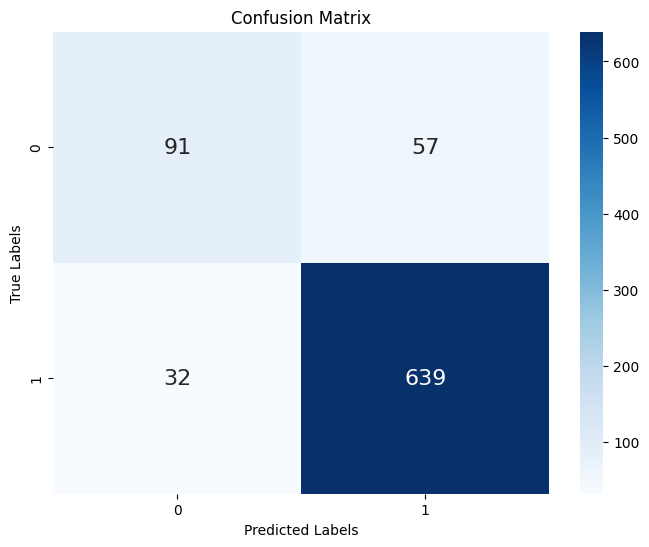

Accuracy on train set:  0.9969437652811736
Accuracy on test set:  0.8913308913308914


In [6]:
# Step 6: Train a machine learning model to calculate the sentiment

# 'Sentiment' includes values of 1 or 0, where 1 is a positive review and 0 is a negative review.
y = df['Sentiment']

# 'Text' contains the written reviews from the users.
X = df['Text']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Inspect the shape of the transformed data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


# Create a Logistic Regression model
model = LogisticRegression(random_state=42,max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Analyze the accuracy
print('Accuracy on train set: ', model.score(X_train, y_train))
print('Accuracy on test set: ', model.score(X_test, y_test))

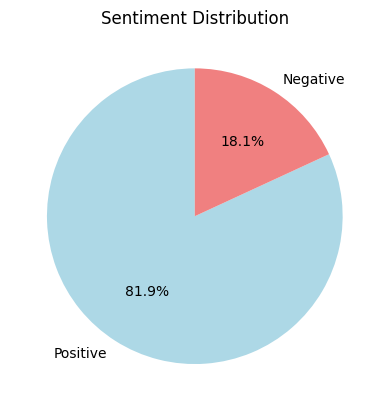

In [7]:
# Calculate the percentage distribution of 'Sentiment' values
sentiment_distribution = df['Sentiment'].value_counts(normalize=True) * 100

# Plot the distribution using a pie chart
labels = ['Positive', 'Negative']
colors = ['lightblue', 'lightcoral']

plt.pie(sentiment_distribution, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

#Conclusion
This project was the first machine learning project we had. It was a great learning experience as we had to figure out things like:
1. Where can we get the data?
2. How to label the dataset?
3. How to do train-test-split?
4. How to train a model?
5. How to analyze if it's good or not?
6. How to improve the model?

One of the main problems was the fact that the only 18% of the dataset was negative reviews and therefore the model we trained was very good at detecting positive reviews but struggled with the negative reviews.